# PosNet Testing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

In [2]:
Data_Dir = os.path.join(os.getcwd(),'../saves/')

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.7.0
Eager execution: True


## Building 2

In [4]:
CheckPoints_MainDir = Data_Dir
SubDirs = ['pos/checkpoints_pos_building2']

In [5]:
import re
def get_all_checkpoints(checkpoints_path,checkpoint_main_name = '(*)_chkpt'):
    all_checkpoints = [j for j in os.listdir(checkpoints_path) if j.startswith(checkpoint_main_name)]
    return all_checkpoints


def analyse_checkpoints(checkpoints_path, loss_weighting=1):
  all_checkpoints = glob.glob(f"{checkpoints_path}/*.hdf5")#get_all_checkpoints(checkpoints_path)  
  all_checkpoints.sort()    
  epochs = []
  tlosses = []
  vlosses = []

  template = "(.*?)_chkpt_epoch_(.*?)_loss_(.*?)_metric_(.*?).hdf5"

  for _checkpoint in all_checkpoints:
    _, e , tl , vl = re.search(template, _checkpoint).groups()
    epochs.append(int(e))
    tlosses.append(float(tl)*loss_weighting)
    vlosses.append(float(vl)*loss_weighting)
  
  best_chkpt_index = np.argmin(vlosses)

  return all_checkpoints,best_chkpt_index, epochs , tlosses , vlosses

Best checkpoint =  14 15
Number of epochs =  18


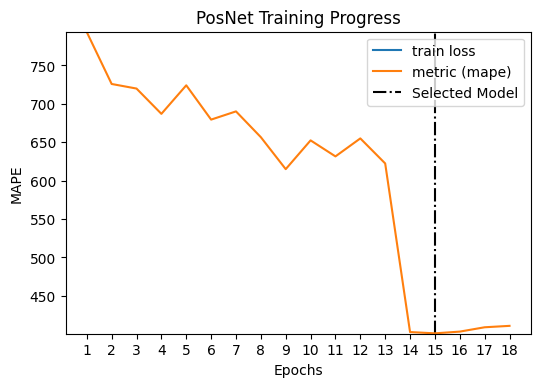

In [6]:
Model_best_chekpoints_paths = []
for i in range(len(SubDirs)) :  
  checkpoints_path = os.path.join(CheckPoints_MainDir,SubDirs[i])
  
  all_checkpoints,best_chkpt_index, epochs , tlosses , vlosses = analyse_checkpoints(checkpoints_path)
  Model_best_chekpoints_paths.append(os.path.join(checkpoints_path,all_checkpoints[best_chkpt_index]))
  
  plt.figure(dpi=100)

  patience = 5
  NumEpochs = len(epochs)
  early_stop_index = best_chkpt_index + patience
  print('Best checkpoint = ' ,best_chkpt_index , epochs[best_chkpt_index] )
  print("Number of epochs = ",NumEpochs)
  
  y_max = np.max(vlosses)+0.5
  y_min = np.min(vlosses)- 0.5

  if early_stop_index < NumEpochs-1:
    stop_epoch_index = early_stop_index+1
    plt.vlines(epochs[early_stop_index],y_min, y_max, colors='r', linestyles='-.',label='Early Stop')
  else:
    stop_epoch_index = NumEpochs



  plt.plot(epochs[:stop_epoch_index] , tlosses[:stop_epoch_index] , label ='train loss')  
  plt.plot(epochs[:stop_epoch_index] , vlosses[:stop_epoch_index] , label ='metric (mape)')
  plt.xticks(epochs[:stop_epoch_index])

  
  plt.ylim((y_min,y_max))
  plt.vlines(epochs[best_chkpt_index],y_min, y_max, colors='k', linestyles='-.',label='Selected Model')
  
  plt.title("PosNet Training Progress")
  plt.legend(loc='best')
  plt.xlabel('Epochs')
  plt.ylabel('MAPE')
  plt.show()

## Building 1